In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [19]:
img = cv2.imread("41.jpg",0)
img.shape

(581, 510)

error: ignored

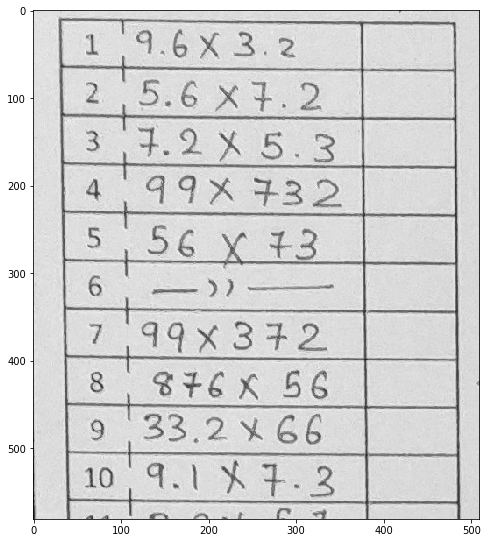

In [11]:
img.shape
plt.figure(figsize=(8,16))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [0]:
ret, img_thres =cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 

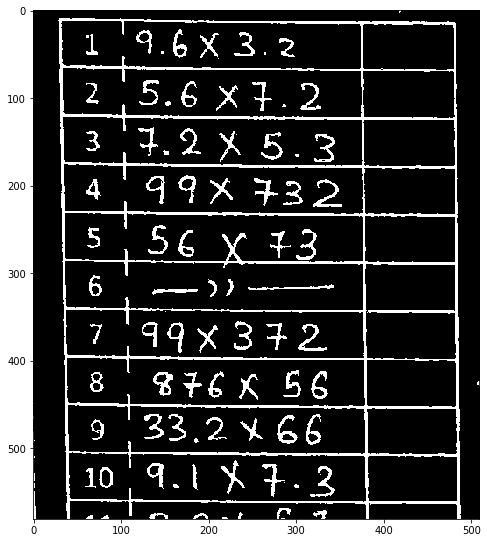

In [21]:
img_thres.shape
plt.figure(figsize=(8,16))
plt.imshow(img_thres, cmap='gray')

In [0]:
contours = cv2.findContours(img_thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]


In [23]:
len(contours)

145

In [0]:
temp = np.zeros((581, 510),dtype=np.uint8)

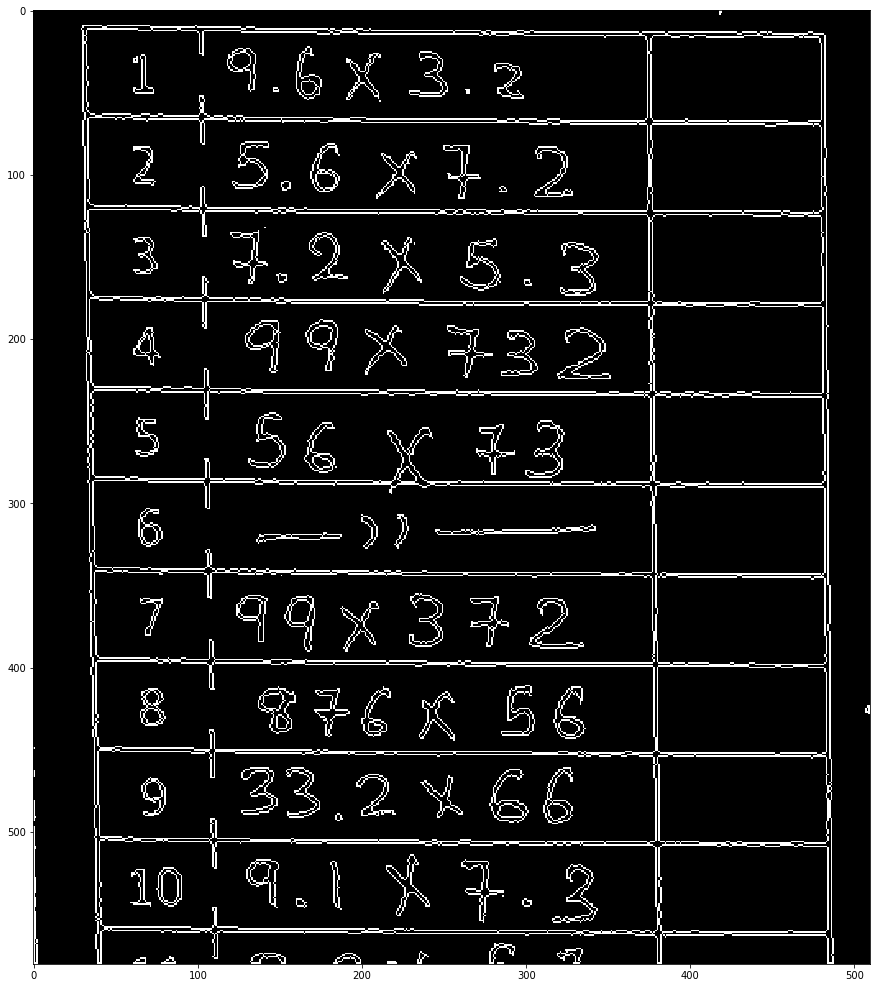

In [27]:
cv2.drawContours(temp, contours=contours, contourIdx=-1, color=(255,255,255))
plt.figure(figsize=(15,30))
plt.imshow(temp,cmap='gray')

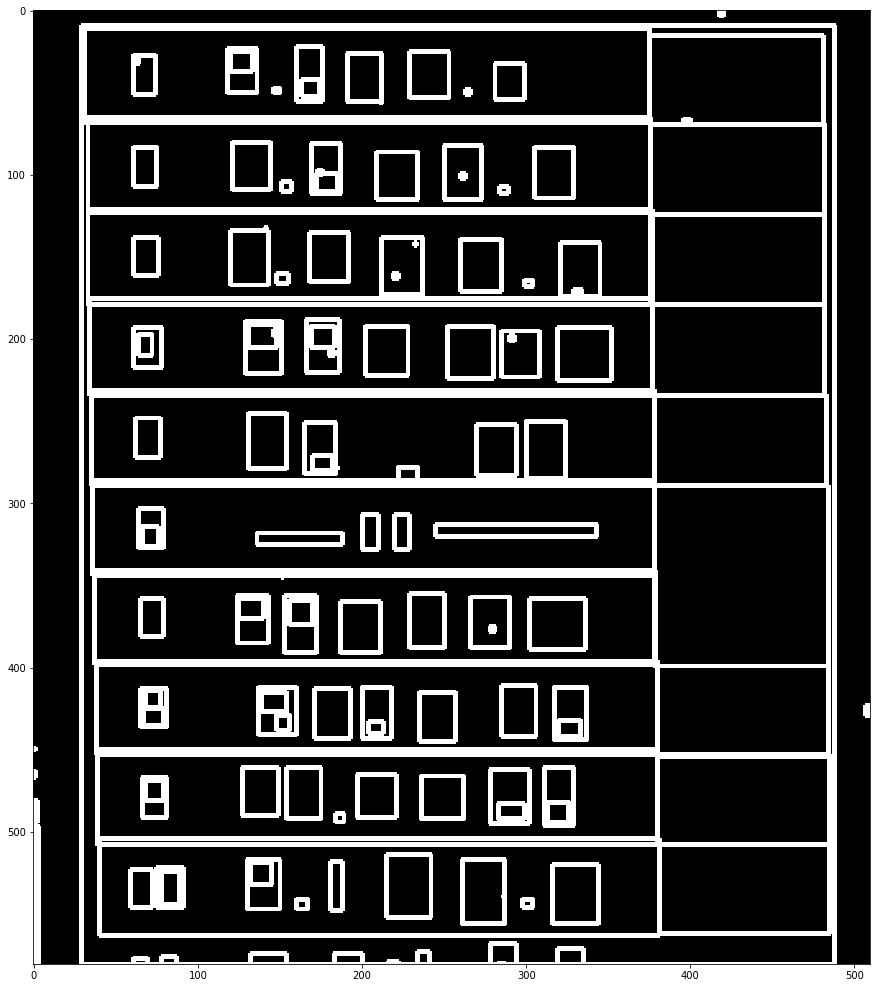

In [30]:
temp =  np.zeros((581, 510),dtype=np.uint8)
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  cv2.rectangle(temp, pt1 = (x,y),pt2=(x+w, y+h), color=(255,0,0), thickness=2)

plt.figure(figsize=(15,30))
plt.imshow(temp,cmap='gray')

In [0]:
temp =  np.zeros((581, 510),dtype=np.uint8)
x,y,w,h = cv2.boundingRect(contours[20])
cv2.rectangle(temp, pt1 = (x,y),pt2=(x+w, y+h), color=(255,0,0), thickness=2)

plt.figure(figsize=(15,30))
plt.imshow(temp,cmap='gray')

In [41]:
kernel_length = np.array(img).shape[1]//40
print(kernel_length)

12


In [42]:
 verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
 verticle_kernel

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

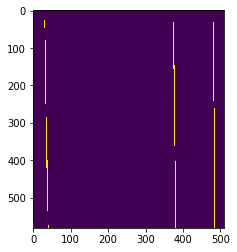

In [43]:
img_temp1 = cv2.erode(img_thres, verticle_kernel, iterations=3)
plt.imshow(img_temp1)

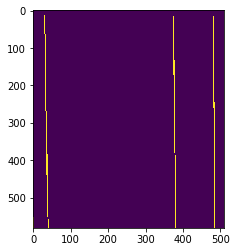

In [45]:
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
plt.imshow(verticle_lines_img)

In [0]:
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
img_temp2 = cv2.erode(img_thres, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
plt.figure(figsize=(15,30))
plt.imshow(horizontal_lines_img)

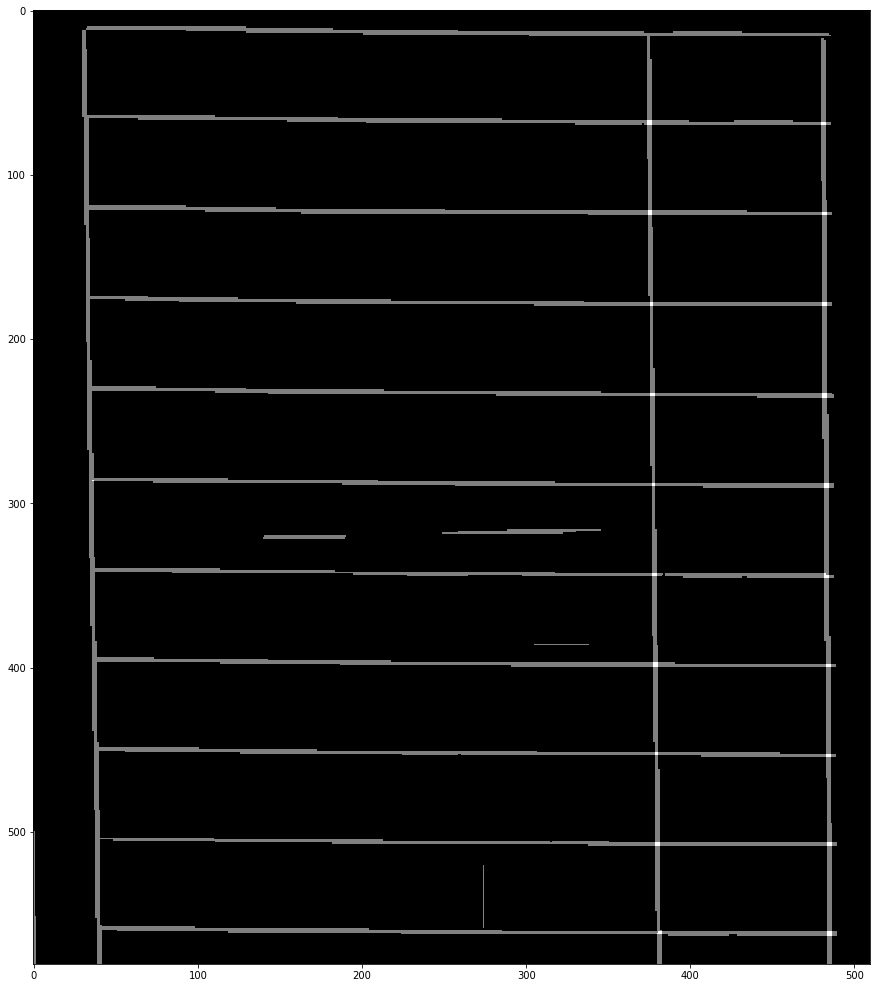

In [54]:
alpha = 0.5
beta = 1.0 - alpha
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
plt.figure(figsize=(15,30))
plt.imshow(img_final_bin, cmap='gray')

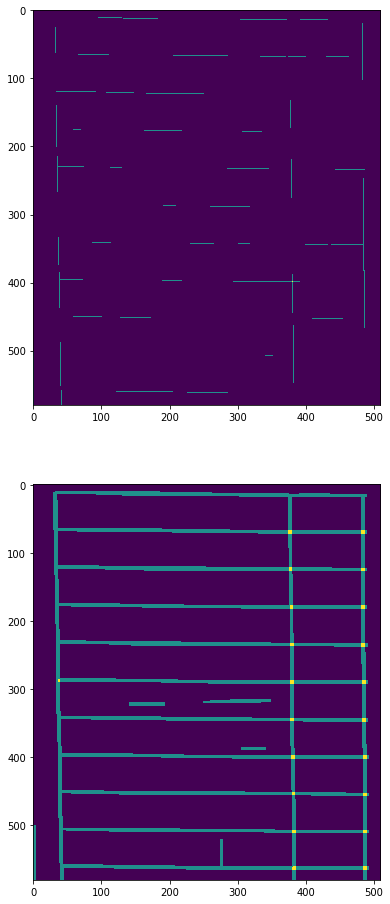

In [64]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_final_bin2 = cv2.erode(img_final_bin, kernel, iterations=2)
img_final_bin3= cv2.dilate(img_final_bin, kernel, iterations=3)
plt.figure(figsize=(8,16))
plt.subplot(2,1,1)
plt.imshow(img_final_bin2)
plt.subplot(2,1,2)
plt.imshow(img_final_bin3)